In [ ]:
#/content/Banking Transaction.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import statsmodels.api as sm
import missingno as msno

In [ ]:
banking_transaction_df = pd.read_csv("/content/Banking Transaction.csv")

In [ ]:
banking_transaction_df.head()

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,143207,25.0
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,181156,1762.5


In [ ]:
banking_transaction_df['transaction_date'].unique()

array(['2/8/2016', '1/8/2016', '3/8/2016', '5/8/2016', '4/8/2016',
       '6/8/2016', '9/8/2016', '8/8/2016', '12/8/2016', '7/8/2016',
       '21/10/16', '16/10/16', '10/8/2016', '14/8/16', '17/8/16',
       '21/8/16', '19/8/16', '24/8/16', '22/8/16', '29/8/16', '31/8/16',
       '22/9/16', '23/9/16', '13/8/16', '25/8/16', '28/8/16', '15/8/16',
       '27/8/16', '20/8/16', '23/8/16', '30/8/16', '11/8/2016', '16/8/16',
       '26/8/16', '27/9/16', '18/8/16', '25/9/16', '26/9/16', '30/9/16',
       '3/9/2016', '2/9/2016', '1/9/2016', '6/9/2016', '5/9/2016',
       '4/9/2016', '9/9/2016', '8/9/2016', '7/9/2016', '12/9/2016',
       '11/9/2016', '10/9/2016', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

In [ ]:
#nhận thấy có nhiều dòng bị khác nhau , 10/1/1994 vs 31/3/56...
banking_transaction_df['customer_dob'].unique()

array(['10/1/1994', '4/4/1957', '26/11/96', ..., '18/7/65', '15/5/42',
       '24/10/44'], dtype=object)

### Step 1: Thực hiện Data Dictionary & Data Quality Assessment

In [ ]:
banking_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1048567 non-null  object 
 1   customer_id           1048567 non-null  object 
 2   customer_dob          1045170 non-null  object 
 3   cust_gender           1047467 non-null  object 
 4   cust_location         1048416 non-null  object 
 5   cust_account_balance  1046198 non-null  float64
 6   transaction_date      1048567 non-null  object 
 7   transaction_time      1048567 non-null  int64  
 8   transaction_amount    1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
banking_transaction_df.shape

(1048567, 9)

In [ ]:
banking_transaction_df.describe()

,cust_account_balance,transaction_time,transaction_amount
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [ ]:
banking_transaction_df.describe(include='object')

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,transaction_date
count,1048567,1048567,1045170,1047467,1048416,1048567
unique,1048567,884265,17254,3,9355,55
top,T1,C5533885,1/1/1800,M,MUMBAI,7/8/2016
freq,1,6,57339,765530,103595,27261


In [ ]:
# chỗ chuyển đổi
banking_transaction_df['transaction_date'] = pd.to_datetime(banking_transaction_df['transaction_date'], format = 'mixed', dayfirst=True)

In [ ]:
banking_transaction_df['customer_dob'] = banking_transaction_df['customer_dob'].astype(str)


In [ ]:
banking_transaction_df['customer_dob'].unique()

array(['10/1/1994', '4/4/1957', '26/11/96', ..., '18/7/65', '15/5/42',
       '24/10/44'], dtype=object)

In [ ]:
def fix_year(dob):
    try:
        day, month, year = dob.split('/')
        year = int(year)
        if year < 100:
          if year >=16:
              year = f'19{year:02d}'
          else:
              year = f'20{year:02d}'
          return f'{day}-{month}-{year}'
        return f'{day}-{month}-{year}'
    except ValueError:
        return dob  # Trả về giá trị ban đầu nếu không thể chuyển đổi


In [ ]:
banking_transaction_df['customer_dob'] = banking_transaction_df['customer_dob'].apply(fix_year)


In [ ]:
banking_transaction_df['customer_dob']

,customer_dob
0,10-1-1994
1,4-4-1957
2,26-11-1996
3,14-9-1973
4,24-3-1988
...,...
1048562,8-4-1990
1048563,20-2-1992
1048564,18-5-1989
1048565,30-8-1978


In [ ]:
#oct 8 - sua toi cho nay

In [ ]:
banking_transaction_df['customer_dob'].unique()

array(['10-1-1994', '4-4-1957', '26-11-1996', ..., '18-7-1965',
       '15-5-1942', '24-10-1944'], dtype=object)

In [ ]:
banking_transaction_df['customer_dob'] = pd.to_datetime(banking_transaction_df['customer_dob'], format = 'mixed', dayfirst=True)

In [ ]:
banking_transaction_df['transaction_date'].unique()

<DatetimeArray>
['2016-08-02 00:00:00', '2016-08-01 00:00:00', '2016-08-03 00:00:00',
 '2016-08-05 00:00:00', '2016-08-04 00:00:00', '2016-08-06 00:00:00',
 '2016-08-09 00:00:00', '2016-08-08 00:00:00', '2016-08-12 00:00:00',
 '2016-08-07 00:00:00', '2016-10-21 00:00:00', '2016-10-16 00:00:00',
 '2016-08-10 00:00:00', '2016-08-14 00:00:00', '2016-08-17 00:00:00',
 '2016-08-21 00:00:00', '2016-08-19 00:00:00', '2016-08-24 00:00:00',
 '2016-08-22 00:00:00', '2016-08-29 00:00:00', '2016-08-31 00:00:00',
 '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-08-13 00:00:00',
 '2016-08-25 00:00:00', '2016-08-28 00:00:00', '2016-08-15 00:00:00',
 '2016-08-27 00:00:00', '2016-08-20 00:00:00', '2016-08-23 00:00:00',
 '2016-08-30 00:00:00', '2016-08-11 00:00:00', '2016-08-16 00:00:00',
 '2016-08-26 00:00:00', '2016-09-27 00:00:00', '2016-08-18 00:00:00',
 '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-30 00:00:00',
 '2016-09-03 00:00:00', '2016-09-02 00:00:00', '2016-09-01 00:00:00',
 '20

In [ ]:
banking_transaction_df['customer_dob'] .unique()

<DatetimeArray>
['1994-01-10 00:00:00', '1957-04-04 00:00:00', '1996-11-26 00:00:00',
 '1973-09-14 00:00:00', '1988-03-24 00:00:00', '1972-10-08 00:00:00',
 '1992-01-26 00:00:00', '1982-01-27 00:00:00', '1988-04-19 00:00:00',
 '1984-06-22 00:00:00',
 ...
 '1957-10-13 00:00:00', '1944-07-30 00:00:00', '2005-08-15 00:00:00',
 '1946-04-06 00:00:00', '1950-01-07 00:00:00', '2015-11-18 00:00:00',
 '1945-06-28 00:00:00', '1965-07-18 00:00:00', '1942-05-15 00:00:00',
 '1944-10-24 00:00:00']
Length: 17255, dtype: datetime64[ns]

In [ ]:
unique_transaction_times = banking_transaction_df['transaction_time'].unique()

# Đếm số ký tự của từng phần tử và lấy độ dài duy nhất
lengths = {len(str(transaction_time)) for transaction_time in unique_transaction_times}

# In các độ dài ký tự duy nhất
print("Các độ dài ký tự duy nhất:")
for length in sorted(lengths):
    print(length)

Các độ dài ký tự duy nhất:
1
2
3
4
5
6


In [ ]:
# hàm format time ra hour
def format_transaction_time(transaction):

    # Chuyển giá trị giao dịch thành chuỗi
    transaction_str = str(transaction)

    # Lấy độ dài của chuỗi
    length = len(transaction_str)

    # Định dạng theo yêu cầu
    if length == 6:
        return transaction_str[:2]
    elif length == 5:
        return transaction_str[0]
    elif length <= 4:
        return '0'
    else:
        return transaction_str

In [ ]:
banking_transaction_df['transaction_time_to_hour'] = banking_transaction_df['transaction_time'].apply(format_transaction_time)

In [ ]:
banking_transaction_df.duplicated().sum()

0

In [ ]:
banking_transaction_df[banking_transaction_df.duplicated()]

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour


In [ ]:
banking_transaction_df.isna().describe()

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour
count,1048567,1048567,1048567,1048567,1048567,1048567,1048567,1048567,1048567,1048567
unique,1,1,2,2,2,2,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,1048567,1048567,1045170,1047467,1048416,1046198,1048567,1048567,1048567,1048567


In [ ]:
banking_transaction_df.isna().sum() / len(banking_transaction_df) * 100

,0
transaction_id,0.000000
customer_id,0.000000
customer_dob,0.323966
cust_gender,0.104905
cust_location,0.014401
cust_account_balance,0.225927
transaction_date,0.000000
transaction_time,0.000000
transaction_amount,0.000000
transaction_time_to_hour,0.000000


#### tính age

In [ ]:
banking_transaction_df['age'] = banking_transaction_df['transaction_date'].dt.year - banking_transaction_df['customer_dob'].dt.year
banking_transaction_df.head()

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,14,22.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,14,59.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,14,20.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,14,43.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,18,28.0


In [ ]:
banking_transaction_df.sort_values(by='age', ascending = False)

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age
739919,T739920,C7942619,1800-01-01,M,BANGALORE,1282730.27,2016-09-01,225120,520.00,22,216.0
59684,T59685,C5856181,1800-01-01,M,GURGAON,25945.99,2016-08-03,210033,66.75,21,216.0
846264,T846265,C2638664,1800-01-01,M,DELHI,2653.75,2016-09-09,123732,1817.00,12,216.0
846262,T846263,C7935875,1800-01-01,M,ADUGODI POST BANGALORE,73477.39,2016-09-09,123917,16061.00,12,216.0
171980,T171981,C8532514,1800-01-01,M,JODHPUR,447104.83,2016-08-04,173022,138.00,17,216.0
...,...,...,...,...,...,...,...,...,...,...,...
1047248,T1047249,C8510525,NaT,M,ZIRAKPUR,98896.96,2016-09-18,5852,3000.00,0,NaN
1047762,T1047763,C3827041,NaT,M,PUNE,91.36,2016-09-18,193122,284.00,19,NaN
1047919,T1047920,C2427054,NaT,M,PUNE,91.36,2016-09-18,201925,365.00,20,NaN
1048152,T1048153,C8138543,NaT,F,REIS MAGOS BARDEZ,2630.67,2016-09-18,181307,252.00,18,NaN


In [ ]:
unique_ages = banking_transaction_df['age'].unique()

# Sắp xếp các giá trị này theo thứ tự giảm dần
sorted_unique_ages = sorted(unique_ages, reverse=True)

sorted_unique_ages

[216.0,
 nan,
 100.0,
 97.0,
 95.0,
 94.0,
 90.0,
 89.0,
 88.0,
 87.0,
 86.0,
 85.0,
 84.0,
 83.0,
 82.0,
 81.0,
 80.0,
 79.0,
 78.0,
 77.0,
 76.0,
 75.0,
 74.0,
 73.0,
 72.0,
 71.0,
 70.0,
 69.0,
 68.0,
 67.0,
 66.0,
 65.0,
 64.0,
 63.0,
 62.0,
 61.0,
 60.0,
 59.0,
 58.0,
 57.0,
 56.0,
 55.0,
 54.0,
 53.0,
 52.0,
 51.0,
 50.0,
 49.0,
 48.0,
 47.0,
 46.0,
 45.0,
 44.0,
 43.0,
 42.0,
 41.0,
 40.0,
 39.0,
 38.0,
 37.0,
 36.0,
 35.0,
 34.0,
 33.0,
 32.0,
 31.0,
 30.0,
 29.0,
 28.0,
 27.0,
 26.0,
 25.0,
 24.0,
 23.0,
 22.0,
 21.0,
 20.0,
 19.0,
 18.0,
 17.0,
 16.0,
 15.0,
 14.0,
 13.0,
 12.0,
 11.0,
 10.0,
 9.0,
 8.0,
 7.0,
 6.0,
 5.0,
 4.0,
 3.0,
 2.0,
 1.0,
 -2.0,
 -4.0,
 -7.0,
 -8.0,
 -9.0,
 -10.0,
 -11.0,
 -12.0,
 -13.0]

### Step 2: Xử lí dữ liệu missing values

In [ ]:
banking_transaction_df[banking_transaction_df['customer_dob'].isna()]

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age
222,T223,C9022645,NaT,M,BHIWANDI,1730.30,2016-10-21,150814,4000.0,15,NaN
1495,T1496,C2515550,NaT,M,NEW DELHI,384.07,2016-10-21,193326,2800.0,19,NaN
2574,T2575,C1934132,NaT,F,MUMBAI,34058.49,2016-10-21,152147,1800.0,15,NaN
3048,T3049,C2313633,NaT,M,NEW DELHI,29854.14,2016-10-21,154905,480.0,15,NaN
3085,T3086,C8585549,NaT,M,GURGAON,44226.67,2016-10-21,192917,11900.0,19,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1047248,T1047249,C8510525,NaT,M,ZIRAKPUR,98896.96,2016-09-18,5852,3000.0,0,NaN
1047762,T1047763,C3827041,NaT,M,PUNE,91.36,2016-09-18,193122,284.0,19,NaN
1047919,T1047920,C2427054,NaT,M,PUNE,91.36,2016-09-18,201925,365.0,20,NaN
1048152,T1048153,C8138543,NaT,F,REIS MAGOS BARDEZ,2630.67,2016-09-18,181307,252.0,18,NaN


In [ ]:
banking_transaction_df[banking_transaction_df['cust_location'].isna()]

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age
2256,T2257,C7383573,1990-11-01,M,NaN,262645.74,2016-10-21,204113,96.00,20,26.0
31269,T31270,C1433534,1973-03-09,M,NaN,2780.38,2016-09-26,124526,75.00,12,43.0
35568,T35569,C2737330,1986-12-10,M,NaN,17000.79,2016-09-26,190506,99.00,19,30.0
41588,T41589,C5833553,1973-03-09,M,NaN,2780.38,2016-08-03,92755,90.00,9,43.0
42840,T42841,C7233515,1973-03-09,M,NaN,2780.38,2016-08-03,93120,14.00,9,43.0
...,...,...,...,...,...,...,...,...,...,...,...
998657,T998658,C4514385,1980-08-17,M,NaN,16426.68,2016-09-14,85202,1900.00,8,36.0
1008646,T1008647,C7210667,1981-04-14,M,NaN,345829.09,2016-09-14,213230,2046.00,21,35.0
1034147,T1034148,C5933513,1973-03-09,M,NaN,2780.38,2016-09-18,180334,25000.00,18,43.0
1035525,T1035526,C4672357,1982-05-28,M,NaN,299489.63,2016-09-18,155141,729.72,15,34.0


In [ ]:
banking_transaction_df[banking_transaction_df['cust_gender'].isna()]

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age
176,T177,C5698953,1800-01-01,NaN,NAVI MUMBAI,8512.28,2016-08-12,155727,3449.00,15,216.0
2124,T2125,C4525944,1800-01-01,NaN,BANGALORE,7115.05,2016-10-21,201052,584.06,20,216.0
5061,T5062,C7541851,1800-01-01,NaN,MUMBAI,10669.85,2016-09-22,61227,1500.00,6,216.0
13035,T13036,C3788162,1800-01-01,NaN,MULUND WEST,65989.63,2016-09-26,210819,336.52,21,216.0
14878,T14879,C6239153,1800-01-01,NaN,NAVI MUMBAI,603.00,2016-09-26,163122,1494.00,16,216.0
...,...,...,...,...,...,...,...,...,...,...,...
1034816,T1034817,C8437074,1800-01-01,NaN,NAVI MUMBAI,1294.44,2016-09-18,174142,392.67,17,216.0
1038102,T1038103,C1320574,1800-01-01,NaN,MUMBAI,6516.33,2016-09-18,135833,100.00,13,216.0
1040773,T1040774,C3979735,1800-01-01,NaN,MUMBAI,25.00,2016-09-18,145528,100.00,14,216.0
1044782,T1044783,C8081531,1800-01-01,NaN,JAIPUR,2222.22,2016-09-18,110038,8335.00,11,216.0


In [ ]:
banking_transaction_df[banking_transaction_df['cust_account_balance'].isna()]

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age
29,T30,C8736958,1986-12-19,M,GRAM PANCHAYTH HYDERABAD,NaN,2016-08-03,160636,2600.0,16,30.0
1271,T1272,C2314972,1993-07-29,M,THANE,NaN,2016-10-21,203227,53.0,20,23.0
2513,T2514,C3742855,1987-03-18,F,MUMBAI,NaN,2016-10-21,150602,300.0,15,29.0
2831,T2832,C3221342,2002-02-27,M,NEW DELHI,NaN,2016-10-21,54746,1.0,5,14.0
3550,T3551,C5921379,2002-02-27,M,NEW DELHI,NaN,2016-10-21,54704,1.0,5,14.0
...,...,...,...,...,...,...,...,...,...,...,...
1045875,T1045876,C4427246,1980-04-25,M,SALEM,NaN,2016-09-18,131053,2363.0,13,36.0
1046193,T1046194,C4813286,1995-11-29,F,INDORE,NaN,2016-09-18,20752,326.0,2,21.0
1046726,T1046727,C1035768,1991-06-09,M,DELHI,NaN,2016-09-18,200816,7500.0,20,25.0
1046825,T1046826,C6231941,1983-08-08,F,NAVI MUMBAI,NaN,2016-09-18,190130,9092.0,19,33.0


In [ ]:
banking_transaction_df[banking_transaction_df['age'].isna()]

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age
222,T223,C9022645,NaT,M,BHIWANDI,1730.30,2016-10-21,150814,4000.0,15,NaN
1495,T1496,C2515550,NaT,M,NEW DELHI,384.07,2016-10-21,193326,2800.0,19,NaN
2574,T2575,C1934132,NaT,F,MUMBAI,34058.49,2016-10-21,152147,1800.0,15,NaN
3048,T3049,C2313633,NaT,M,NEW DELHI,29854.14,2016-10-21,154905,480.0,15,NaN
3085,T3086,C8585549,NaT,M,GURGAON,44226.67,2016-10-21,192917,11900.0,19,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1047248,T1047249,C8510525,NaT,M,ZIRAKPUR,98896.96,2016-09-18,5852,3000.0,0,NaN
1047762,T1047763,C3827041,NaT,M,PUNE,91.36,2016-09-18,193122,284.0,19,NaN
1047919,T1047920,C2427054,NaT,M,PUNE,91.36,2016-09-18,201925,365.0,20,NaN
1048152,T1048153,C8138543,NaT,F,REIS MAGOS BARDEZ,2630.67,2016-09-18,181307,252.0,18,NaN


<ipython-input-40-eede5a908049>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette="viridis")


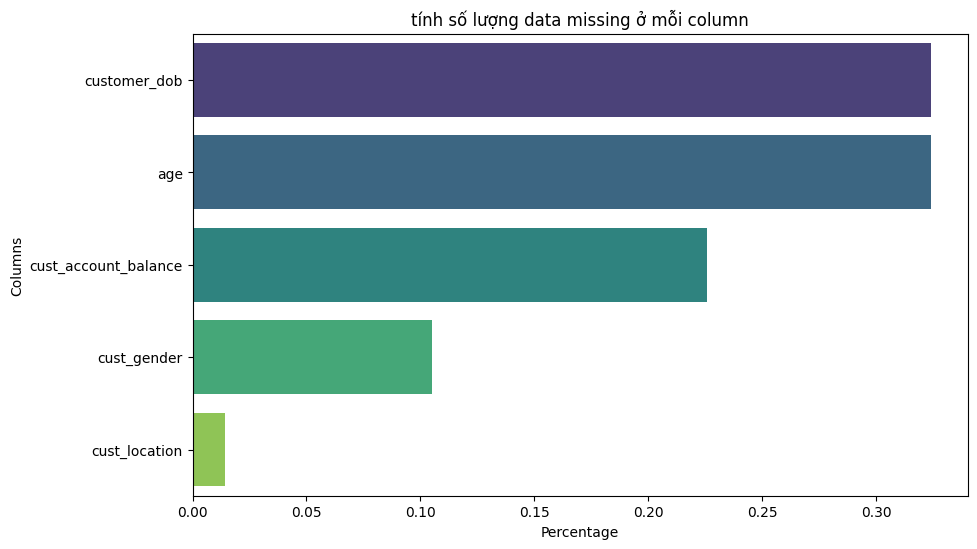

In [ ]:
# tính số lượng data missing ở mỗi column
missing_percentage = banking_transaction_df.isnull().mean() *100
#sort theo lượng cao tới thấp
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette="viridis")
plt.title('tính số lượng data missing ở mỗi column')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show()


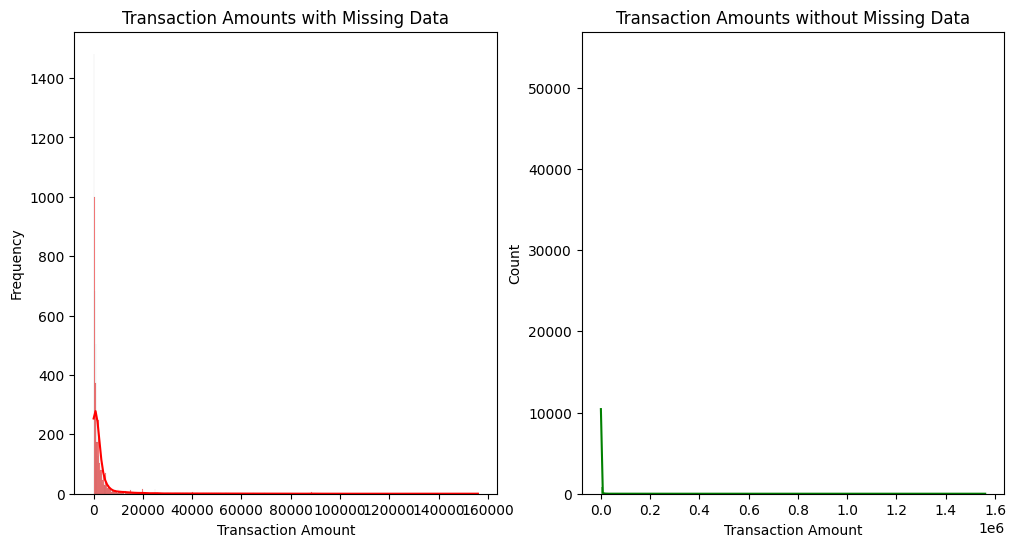

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#sort missing data vao 1 column
banking_transaction_df['any_missing'] = banking_transaction_df.isnull().any(axis=1)

transactions_with_missing = banking_transaction_df[banking_transaction_df['any_missing'] == True]['transaction_amount']
transactions_without_missing = banking_transaction_df[banking_transaction_df['any_missing'] == False]['transaction_amount']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(transactions_with_missing, kde=True, color='red')
plt.title('Transaction Amounts with Missing Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(transactions_without_missing, kde=True, color='green')
plt.title('Transaction Amounts without Missing Data')
plt.xlabel('Transaction Amount')
plt.show()


số lượng missing value chỉ khoảng 2% nên drop hết

In [ ]:
banking_transaction_df.dropna(subset=['cust_account_balance'], inplace=True)

In [ ]:
banking_transaction_df.dropna(subset=['cust_location'], inplace=True)

In [ ]:
banking_transaction_df.dropna(subset=['cust_gender'], inplace=True)

In [ ]:
banking_transaction_df = banking_transaction_df[~(banking_transaction_df['cust_gender'] =='T')]

In [ ]:
banking_transaction_df.dropna(subset=['age'], inplace=True)

In [ ]:
banking_transaction_df.isna().sum()

,0
transaction_id,0
customer_id,0
customer_dob,0
cust_gender,0
cust_location,0
cust_account_balance,0
transaction_date,0
transaction_time,0
transaction_amount,0
transaction_time_to_hour,0


In [ ]:
banking_transaction_df['age'].unique()

array([ 22.,  59.,  20.,  43.,  28.,  44.,  24.,  34.,  32.,  38.,  48.,
       216.,  27.,  25.,  31.,  23.,  30.,  49.,  37.,  39.,  19.,  33.,
        26.,  36.,  35.,  50.,  29.,  41.,  21.,  42.,  45.,  84.,  57.,
        17.,  51.,  75.,  62.,  46.,  40.,  95.,  47.,  12.,  73.,  18.,
        65.,  56.,  60.,  63.,  69.,  16.,  52.,  68.,  54.,  64.,  61.,
        55.,  80.,  53.,  74.,  72.,  78.,  67.,  58.,  66.,  70.,  14.,
        71.,  79.,   9.,  15.,  77.,  76.,   3.,  13.,  11.,   6.,   5.,
        83.,  82.,  89.,  97.,  88.,  86.,   7.,  85.,  87.,  81.,   1.,
       -13., -11., 100.,  10.,   8.,   4.,  -7.,  90.,  -8., -12.,  94.,
         2.,  -4.,  -9., -10.,  -2.])

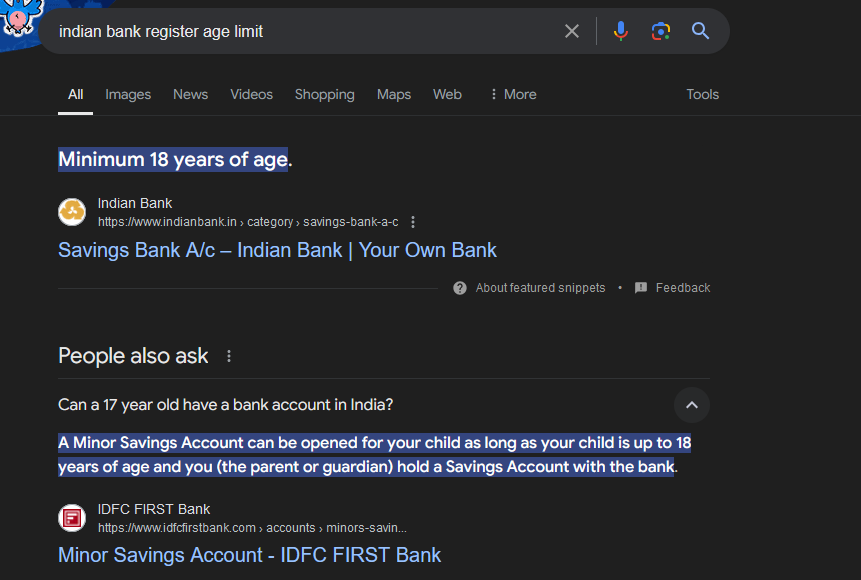

# explain

theo luật của indian , trẻ em khoảng 18 tuổi mới được làm bank nên em sẽ loc hết dưới 18 và fill lại để dataset chuẩn hơn

In [ ]:
#clean negative age

banking_transaction_df = banking_transaction_df[(banking_transaction_df['age'] >= 0) & (banking_transaction_df['age'] <= 120) | banking_transaction_df['age'].isna()]

In [ ]:
#vì drop khá nhiều dữ liệu âm tuổi nên em fill lại với median age

median_age = banking_transaction_df['age'].median()
banking_transaction_df['age'].fillna(median_age, inplace=True)

<ipython-input-50-df5f9a0763f8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  banking_transaction_df['age'].fillna(median_age, inplace=True)
<ipython-input-50-df5f9a0763f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking_transaction_df['age'].fillna(median_age, inplace=True)


In [ ]:
banking_transaction_df['age'] = banking_transaction_df['age'].astype(int)


<ipython-input-51-c3e651dccc62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banking_transaction_df['age'] = banking_transaction_df['age'].astype(int)


In [ ]:
banking_transaction_df['age'].unique()

array([ 22,  59,  20,  43,  28,  44,  24,  34,  32,  38,  48,  27,  25,
        31,  23,  30,  49,  37,  39,  19,  33,  26,  36,  35,  50,  29,
        41,  21,  42,  45,  84,  57,  17,  51,  75,  62,  46,  40,  95,
        47,  12,  73,  18,  65,  56,  60,  63,  69,  16,  52,  68,  54,
        64,  61,  55,  80,  53,  74,  72,  78,  67,  58,  66,  70,  14,
        71,  79,   9,  15,  77,  76,   3,  13,  11,   6,   5,  83,  82,
        89,  97,  88,  86,   7,  85,  87,  81,   1, 100,  10,   8,   4,
        90,  94,   2])

In [ ]:
banking_transaction_df.sort_values(by=['age'])

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age,any_missing
696923,T696924,C5628584,2015-03-21,M,RAJKOT,6083.67,2016-08-30,141420,3200.00,14,1,False
874099,T874100,C1930582,2015-04-08,M,BHIWANDI,30609.56,2016-09-08,192621,58.00,19,1,False
410462,T410463,C4931945,2015-11-25,M,CHENNAI,2775.24,2016-08-17,105537,3532.72,10,1,False
877096,T877097,C8730531,2015-04-08,M,BHIWANDI,30609.56,2016-09-08,192727,58.00,19,1,False
286801,T286802,C3348071,2015-05-21,M,BARMER,4.13,2016-08-11,191456,275.00,19,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
170160,T170161,C7625552,1919-12-15,F,DELHI,27081.15,2016-08-04,173609,500.00,17,97,False
790373,T790374,C4725574,1919-12-15,F,DELHI,27081.15,2016-09-05,101709,1000.00,10,97,False
26154,T26155,C4925544,1919-12-15,F,DELHI,27081.15,2016-09-26,173300,12580.29,17,97,False
128470,T128471,C6946973,1916-02-22,M,SURAT,16205.90,2016-08-06,180116,294.00,18,100,False


In [ ]:
# Corrected age bins and labels
bins = [0, 18, 30, 40, 50, 60, float('inf')]  # Use `float('inf')` to represent 60 and above
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']  # Adjust labels to match the bins

# Apply pd.cut to create the age_group column
banking_transaction_df['age_group'] = pd.cut(banking_transaction_df['age'], bins=bins, labels=labels, right=True)

# Display the resulting age groups (optional)
print(banking_transaction_df[['age', 'age_group']].head())


   age age_group
0   22     19-30
1   59     51-60
2   20     19-30
3   43     41-50
4   28     19-30


In [ ]:
#  tỉ lệ các nhóm tuổi
age_group_proportions = banking_transaction_df.groupby('age_group').size() / len(banking_transaction_df) * 100
print(age_group_proportions)


age_group
0-18      0.356561
19-30    59.224701
31-40    28.538152
41-50     7.867477
51-60     2.534088
60+       1.479021
dtype: float64


<ipython-input-55-9bc23f561148>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_proportions = banking_transaction_df.groupby('age_group').size() / len(banking_transaction_df) * 100


In [ ]:
banking_transaction_df

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age,any_missing,age_group
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,14,22,False,19-30
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,14,59,False,51-60
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,14,20,False,19-30
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,14,43,False,41-50
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,18,28,False,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,18,26,False,19-30
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,18,24,False,19-30
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,18,27,False,19-30
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,18,38,False,31-40


##### Tách nhóm dữ liệu

##### xuất file csv 4 tập dữ vẽ dashboard

In [ ]:
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']  # Adjust labels to match the bins


In [ ]:
banking_transaction_df[banking_transaction_df['age_group'] == '0-18'].to_csv('cust_under_18.csv', index=False)
banking_transaction_df[banking_transaction_df['age_group'] == '19-30'].to_csv('cust_19_to_30.csv', index=False)
banking_transaction_df[banking_transaction_df['age_group'] == '31-40'].to_csv('cust_31_to_40.csv', index=False)
banking_transaction_df[banking_transaction_df['age_group'] == '41-50'].to_csv('cust_41_to_50.csv', index=False)
banking_transaction_df[banking_transaction_df['age_group'] == '51-60'].to_csv('cust_51_to_60.csv', index=False)
banking_transaction_df[banking_transaction_df['age_group'] == '60+'].to_csv('cust_special.csv', index=False)



In [ ]:

cust_under_18_df = pd.read_csv('cust_under_18.csv')
cust_19_to_30_df = pd.read_csv('cust_19_to_30.csv')
cust_31_to_40_df = pd.read_csv('cust_31_to_40.csv')
cust_41_to_50_df = pd.read_csv('cust_41_to_50.csv')
cust_51_to_60_df = pd.read_csv('cust_51_to_60.csv')
cust_special_df = pd.read_csv('cust_special.csv')


In [ ]:

# cust_under_18 = pd.read_csv('cust_under_18.csv')
# cust_19_to_39 = pd.read_csv('cust_19_to_39.csv')
# cust_40_to_55 = pd.read_csv('cust_40_to_55.csv')
# cust_special = pd.read_csv('cust_special.csv')


### Step 3: Phân tích đơn biến (Univariate Analysis)


In [ ]:
print(age_group_proportions)

age_group
0-18      0.356561
19-30    59.224701
31-40    28.538152
41-50     7.867477
51-60     2.534088
60+       1.479021
dtype: float64


<ipython-input-62-9f14b5356553>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=banking_transaction_df, palette='Set2')


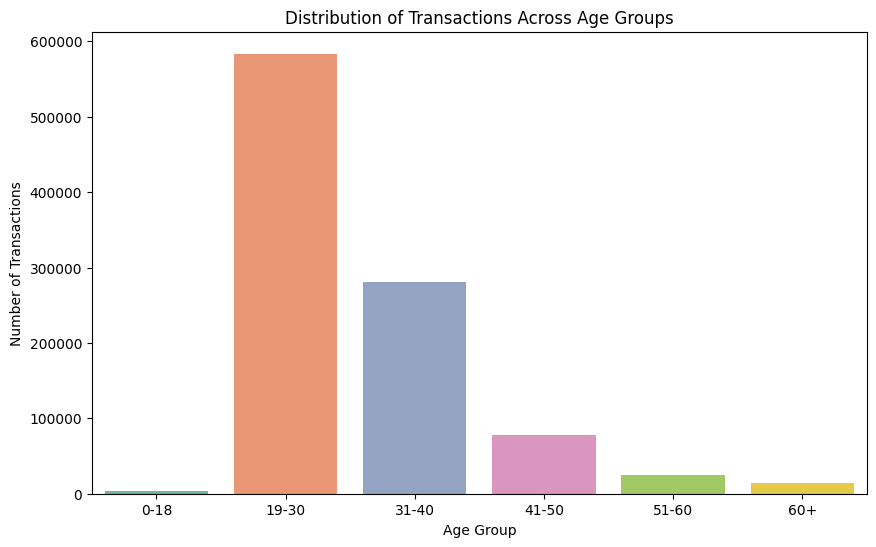

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=banking_transaction_df, palette='Set2')
plt.title('Distribution of Transactions Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')


plt.show()


In [ ]:
# prompt: do this with all age groups : print("age 0 - 18 transaction amount describe:")
# print(cust_under_18[['transaction_amount', 'cust_account_balance']].describe() / 100 , "\n")

print("age 0 - 18 transaction amount describe:")
print(cust_under_18_df[['transaction_amount', 'cust_account_balance']].describe() / 100 , "\n")

print("age 19 - 30 transaction amount describe:")
print(cust_19_to_30_df[['transaction_amount', 'cust_account_balance']].describe() / 100 , "\n")

print("age 31 - 40 transaction amount describe:")
print(cust_31_to_40_df[['transaction_amount', 'cust_account_balance']].describe() / 100 , "\n")

print("age 41 - 50 transaction amount describe:")
print(cust_41_to_50_df[['transaction_amount', 'cust_account_balance']].describe() / 100 , "\n")

print("age 51 - 60 transaction amount describe:")
print(cust_51_to_60_df[['transaction_amount', 'cust_account_balance']].describe() / 100 , "\n")

print("age 60+ transaction amount describe:")
print(cust_special_df[['transaction_amount', 'cust_account_balance']].describe() / 100 , "\n")


age 0 - 18 transaction amount describe:
       transaction_amount  cust_account_balance
count           35.130000             35.130000
mean            14.559452            331.358164
std             45.424123           1922.009489
min              0.000000              0.000000
25%              1.000000             28.233000
50%              3.000000             78.280200
75%              9.747000            188.975000
max           1007.420000         102688.006200 

age 19 - 30 transaction amount describe:
       transaction_amount  cust_account_balance
count         5835.090000           5835.090000
mean            10.348925            519.251462
std             40.550319           2297.274583
min              0.000000              0.000000
25%              1.000000             33.224500
50%              3.000000            114.778700
75%              8.490000            342.647700
max           6000.083200         243833.403800 

age 31 - 40 transaction amount describe:
       tra

#### Analysis

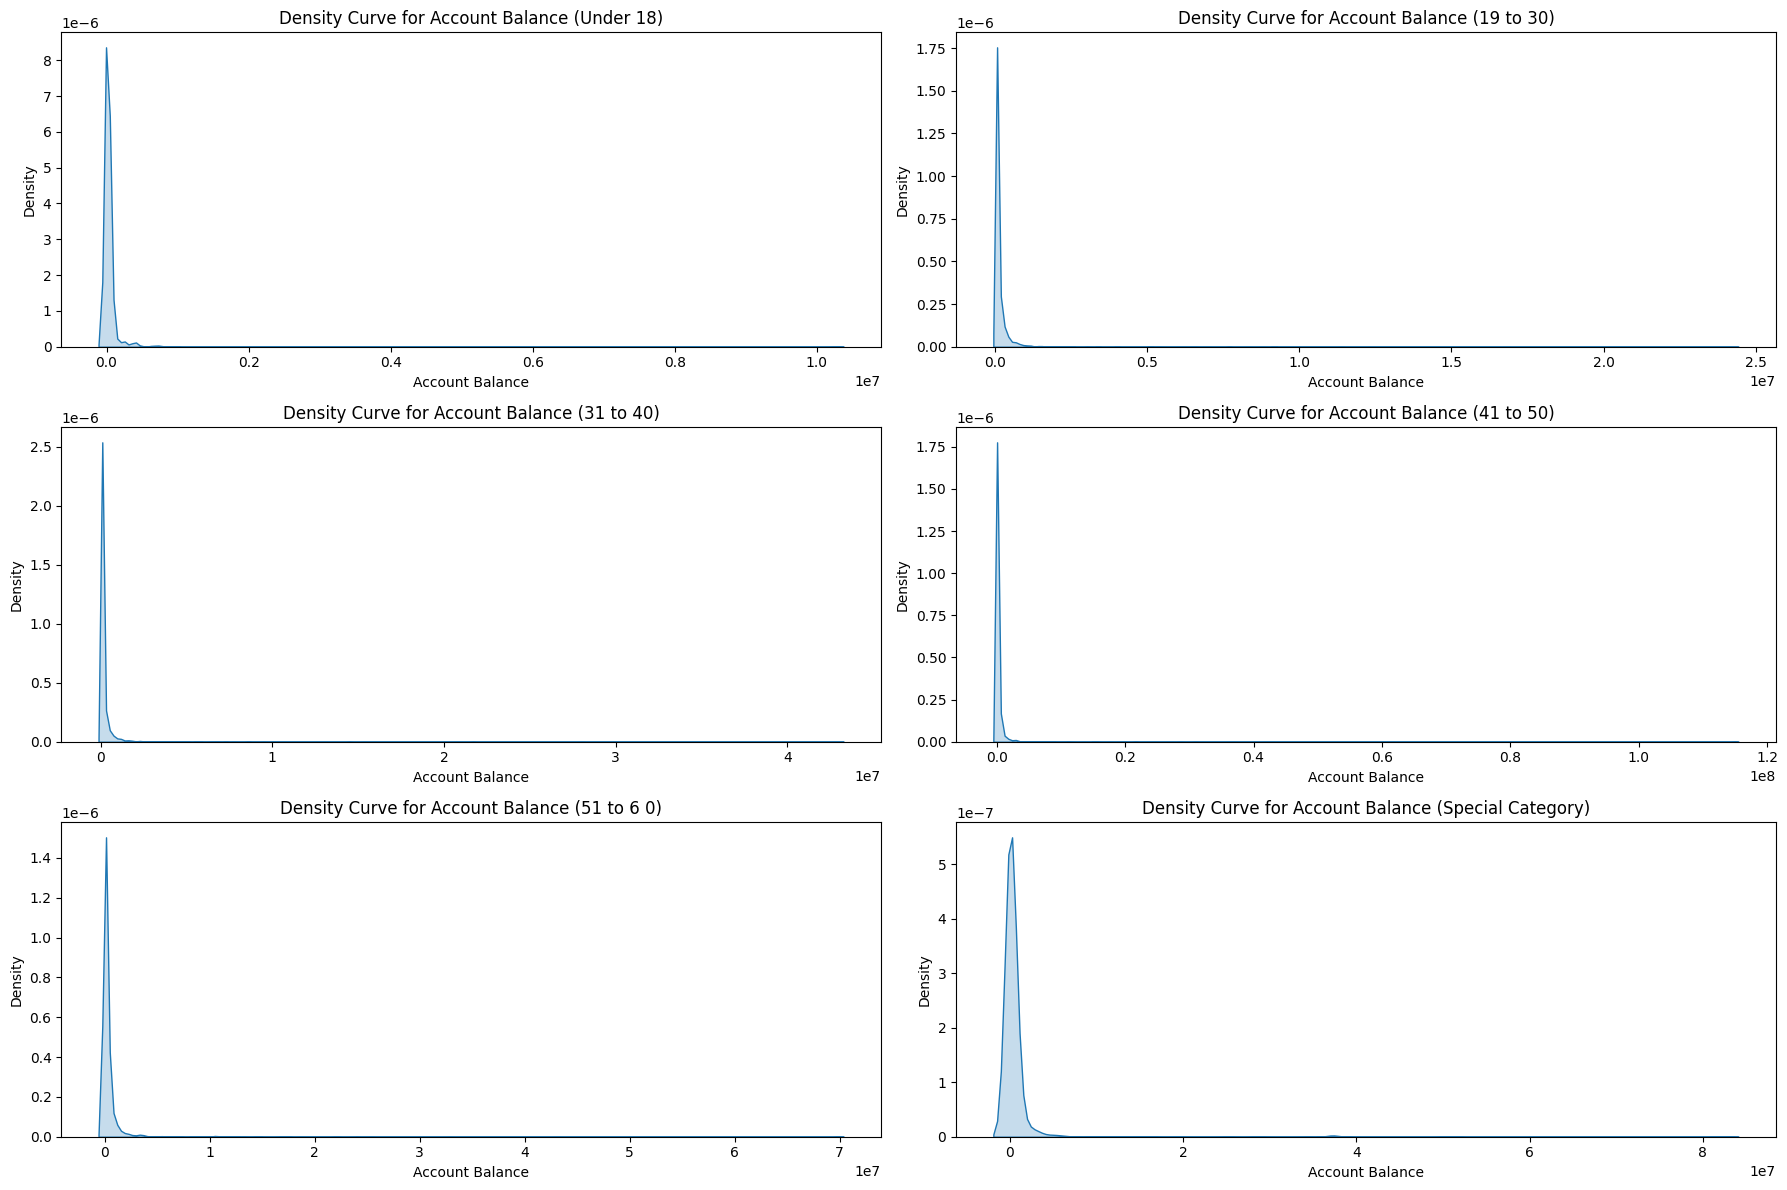

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_density_plots(datasets, titles, xlabel, ylabel):

    fig, axes = plt.subplots(3, 2, figsize=(18, 12))  # Tạo figure với 4 subplots (2x2)
    axes = axes.flatten()  # Chuyển mảng 2D thành 1D để dễ truy cập

    for i, (data, title) in enumerate(zip(datasets, titles)):
        sns.kdeplot(data['cust_account_balance'], ax=axes[i], fill=True)
        axes[i].set_title(title)
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)

    plt.tight_layout()  # Điều chỉnh khoảng cách giữa các subplots
    plt.show()

# Ví dụ sử dụng hàm
datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]  # List of DataFrames for each age group
titles = [
    'Density Curve for Account Balance (Under 18)',
    'Density Curve for Account Balance (19 to 30)',
    'Density Curve for Account Balance (31 to 40)',
    'Density Curve for Account Balance (41 to 50)',
    'Density Curve for Account Balance (51 to 6 0)',
    'Density Curve for Account Balance (Special Category)'
]
xlabel = 'Account Balance'
ylabel = 'Density'

create_density_plots(datasets, titles, xlabel, ylabel)


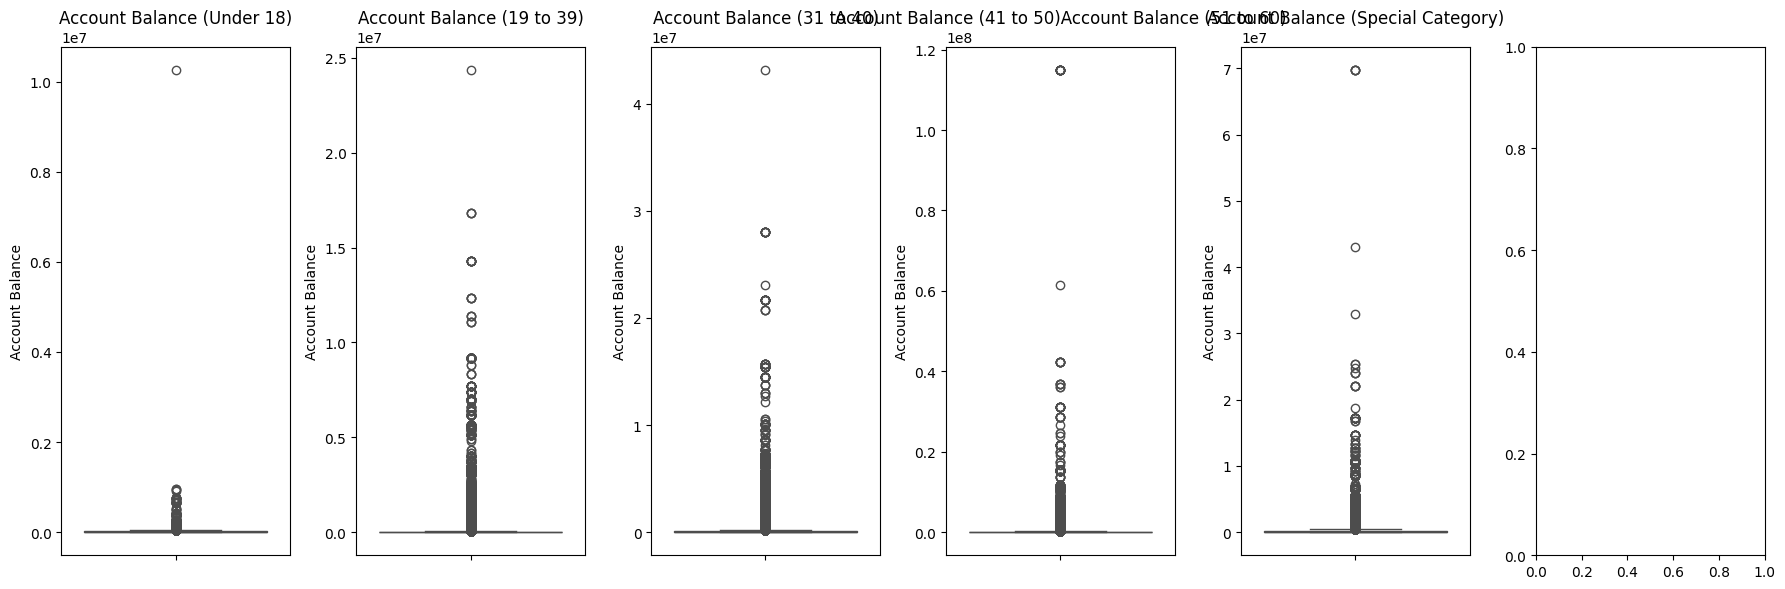

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_financial_boxplots(datasets, titles, ylabel, show_column):

    fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6))
    for i, (data, title) in enumerate(zip(datasets, titles)):
        sns.boxplot(y=show_column, data=data, ax=axes[i], color='red')
        axes[i].set_title(title)
        axes[i].set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]

titles = [
    'Account Balance (Under 18)',
    'Account Balance (19 to 39)',
    'Account Balance (31 to 40)',
    'Account Balance (41 to 50)'
    'Account Balance (51 to 60)',
    'Account Balance (Special Category)'
]
ylabel = 'Account Balance'
show_column = 'cust_account_balance'

create_financial_boxplots(datasets, titles, ylabel, show_column)


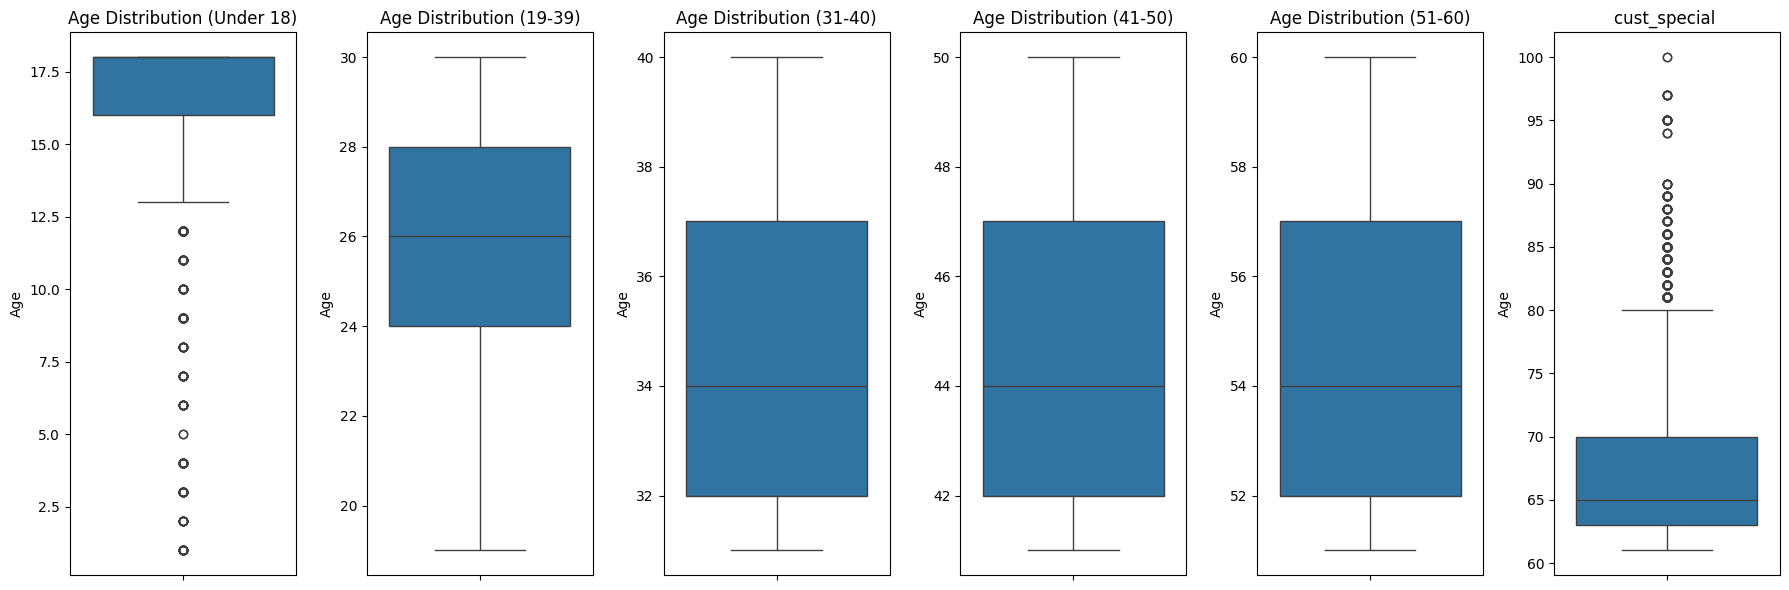

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_age_boxplots(datasets, titles, ylabel):
    """
    Tạo và hiển thị ba biểu đồ boxplot cho cột 'age'.

    :param datasets: Danh sách các DataFrame chứa dữ liệu cần vẽ biểu đồ.
    :param titles: Danh sách các tiêu đề cho từng biểu đồ.
    :param ylabel: Nhãn trục Y.
    """
    fig, axes = plt.subplots(1, 6, figsize=(18, 6))

    for i, (data, title) in enumerate(zip(datasets, titles)):
        sns.boxplot(y='age', data=data, ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_ylabel(ylabel)

    plt.tight_layout()  # Điều chỉnh khoảng cách giữa các subplots
    plt.show()

# Ví dụ sử dụng hàm

datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]


titles = [
    'Age Distribution (Under 18)',
    'Age Distribution (19-39)',
    'Age Distribution (31-40)',
        'Age Distribution (41-50)',
        'Age Distribution (51-60)',

    'cust_special '
]
ylabel = 'Age'

create_age_boxplots(datasets, titles, ylabel)


In [ ]:
#10/10/2024

In [ ]:
banking_transaction_df.head()

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age,any_missing,age_group
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,14,22,False,19-30
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,14,59,False,51-60
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,14,20,False,19-30
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,14,43,False,41-50
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,18,28,False,19-30


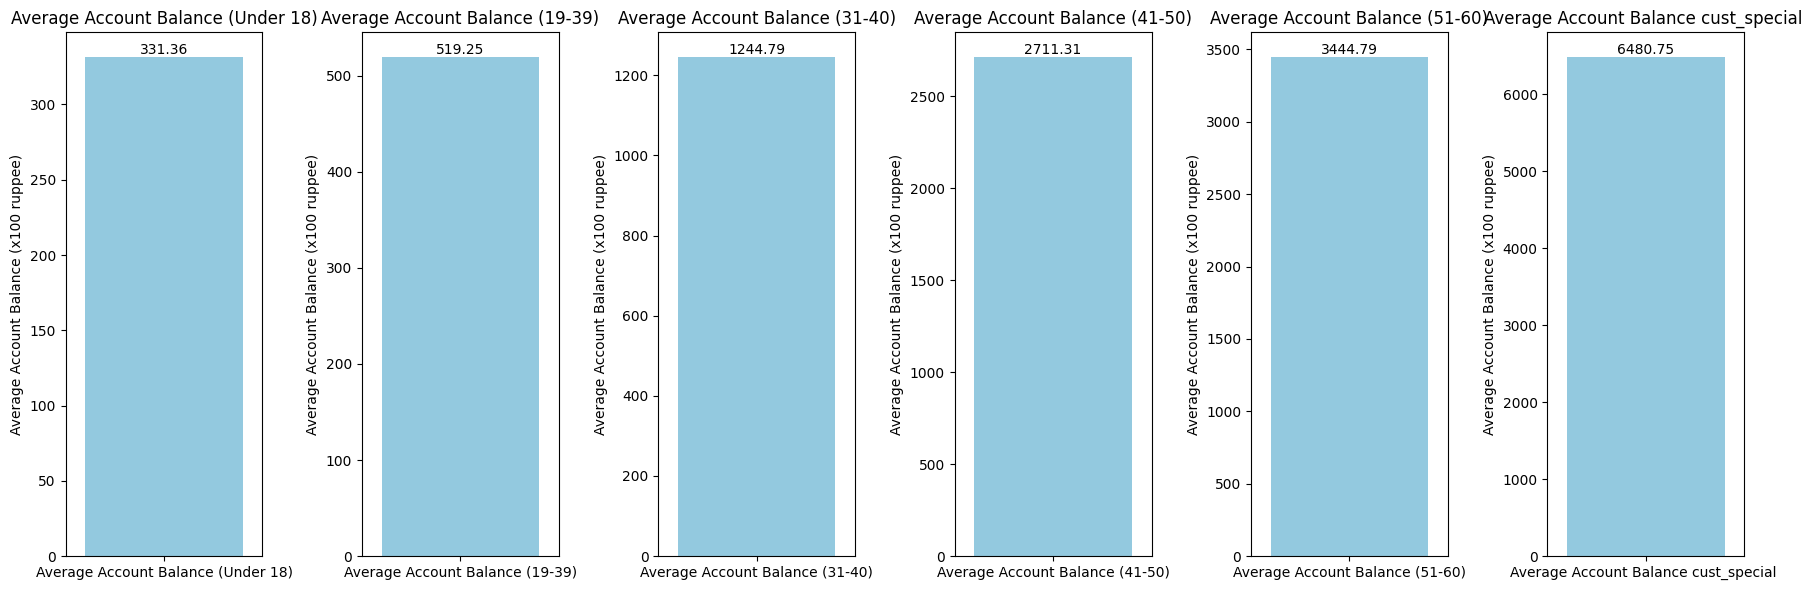

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_financial_bar_plots(datasets, titles, ylabel, output_show):


    fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6))

    for i, (data, title) in enumerate(zip(datasets, titles)):
        mean_values = data[output_show].mean() / 100

        sns.barplot(x=[title], y=[mean_values], ax=axes[i], color='skyblue')
        axes[i].set_title(title)
        axes[i].set_ylabel(ylabel)

        axes[i].text(0, mean_values, f'{mean_values:.2f}', color='black', ha="center", va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage of the function

datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]


titles = [
    'Average Account Balance (Under 18)',
    'Average Account Balance (19-39)',
    'Average Account Balance (31-40)',
        'Average Account Balance (41-50)',
        'Average Account Balance (51-60)',

    'Average Account Balance cust_special '
]
ylabel = 'Average Account Balance (x100 ruppee)'
output_show = 'cust_account_balance'

create_financial_bar_plots(datasets, titles, ylabel, output_show)


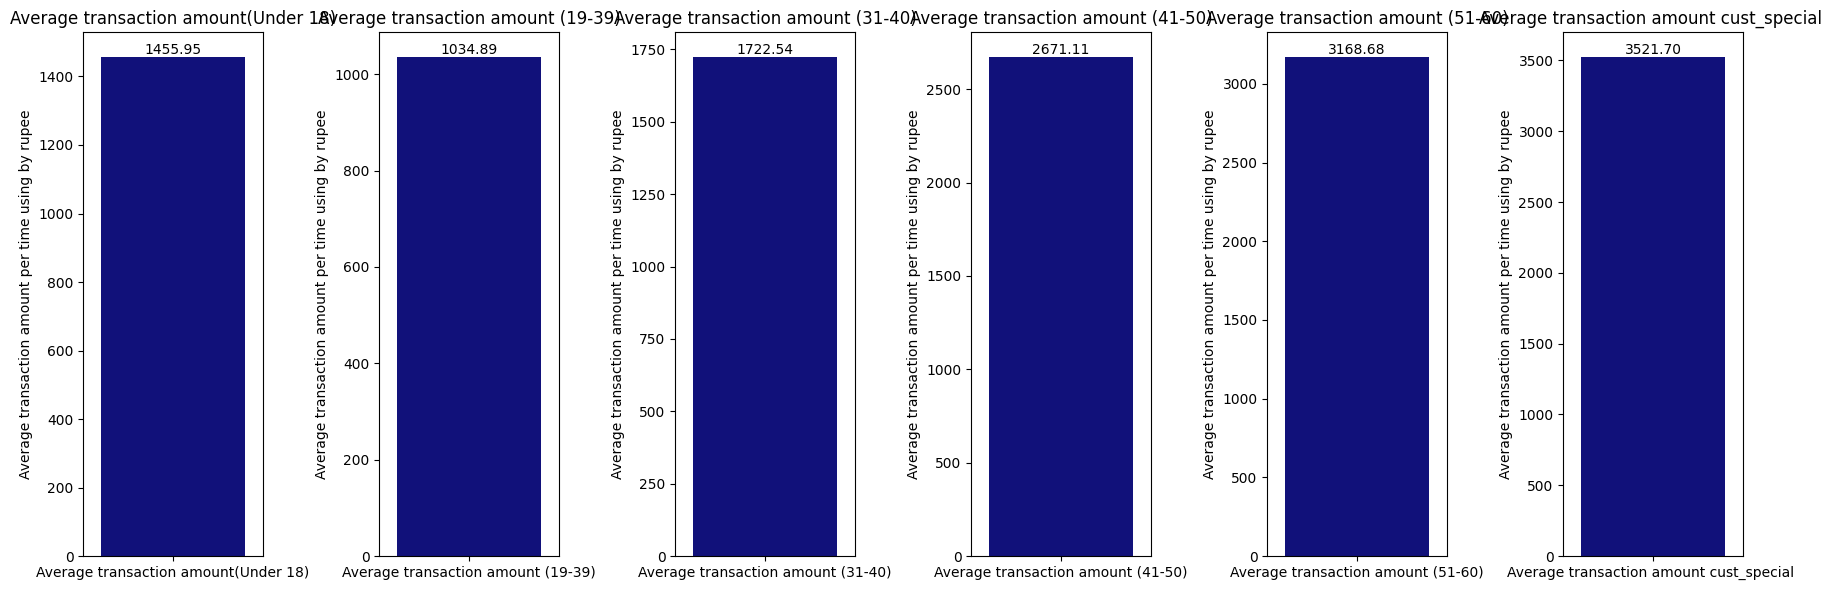

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_financial_bar_plots(datasets, titles, ylabel, output_show):


    fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6))

    for i, (data, title) in enumerate(zip(datasets, titles)):
        mean_values = data[output_show].mean()

        sns.barplot(x=[title], y=[mean_values], ax=axes[i], color='darkblue')
        axes[i].set_title(title)
        axes[i].set_ylabel(ylabel)

        axes[i].text(0, mean_values, f'{mean_values:.2f}', color='black', ha="center", va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage of the function
datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]

titles = [
    'Average transaction amount(Under 18)',
    'Average transaction amount (19-39)',
    'Average transaction amount (31-40)',
        'Average transaction amount (41-50)',
        'Average transaction amount (51-60)',

    'Average transaction amount cust_special '
]
ylabel = 'Average transaction amount per time using by rupee'
output_show = 'transaction_amount'

create_financial_bar_plots(datasets, titles, ylabel, output_show)


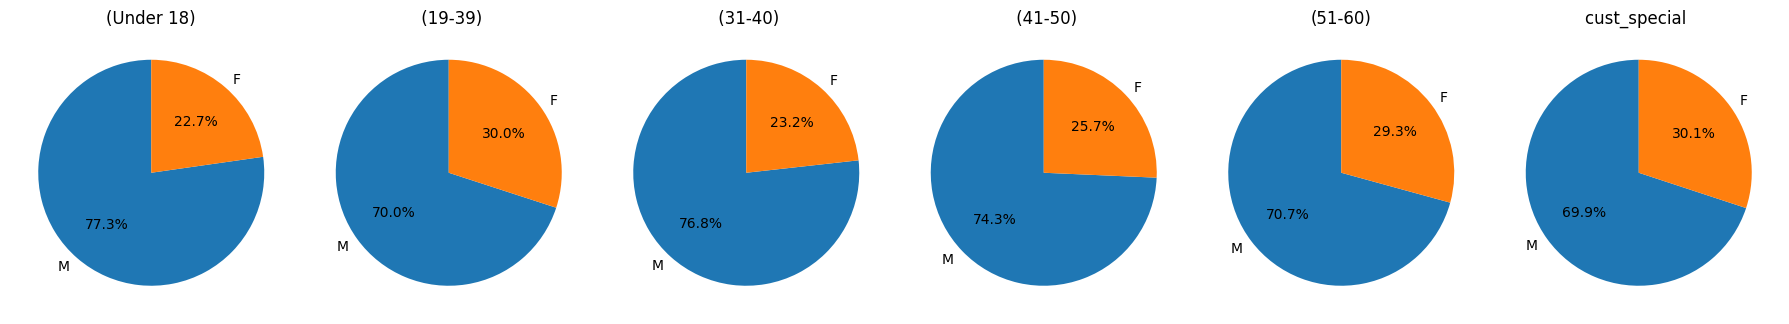

In [ ]:

import matplotlib.pyplot as plt
def create_gender_pie_charts(datasets, titles):

    fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6))

    for i, (data, title) in enumerate(zip(datasets, titles)):
        gender_counts = data['cust_gender'].value_counts()
        axes[i].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(title)

    plt.tight_layout()
    plt.show()

datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]


titles = [
    '(Under 18)',
    ' (19-39)',
    ' (31-40)',
        ' (41-50)',
        '(51-60)',

    'cust_special '
]

create_gender_pie_charts(datasets, titles)



# 2 months Moving average (MA)
ideas : https://medium.com/codex/complete-walkthrough-of-how-to-do-a-moving-average-forecasting-using-python-or-r-61d3ddc9ca15


A moving average (MA) is a widely used statistical technique in time series analysis to smooth out short-term fluctuations and highlight longer-term trends.

In [ ]:
banking_transaction_df

,transaction_id,customer_id,customer_dob,cust_gender,cust_location,cust_account_balance,transaction_date,transaction_time,transaction_amount,transaction_time_to_hour,age,any_missing,age_group
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,14,22,False,19-30
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,14,59,False,51-60
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,14,20,False,19-30
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,14,43,False,41-50
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,18,28,False,19-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,18,26,False,19-30
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,18,24,False,19-30
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,18,27,False,19-30
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,18,38,False,31-40


In [ ]:
#MA theo time-series thì mình vẽ line graph - 13/10/2024

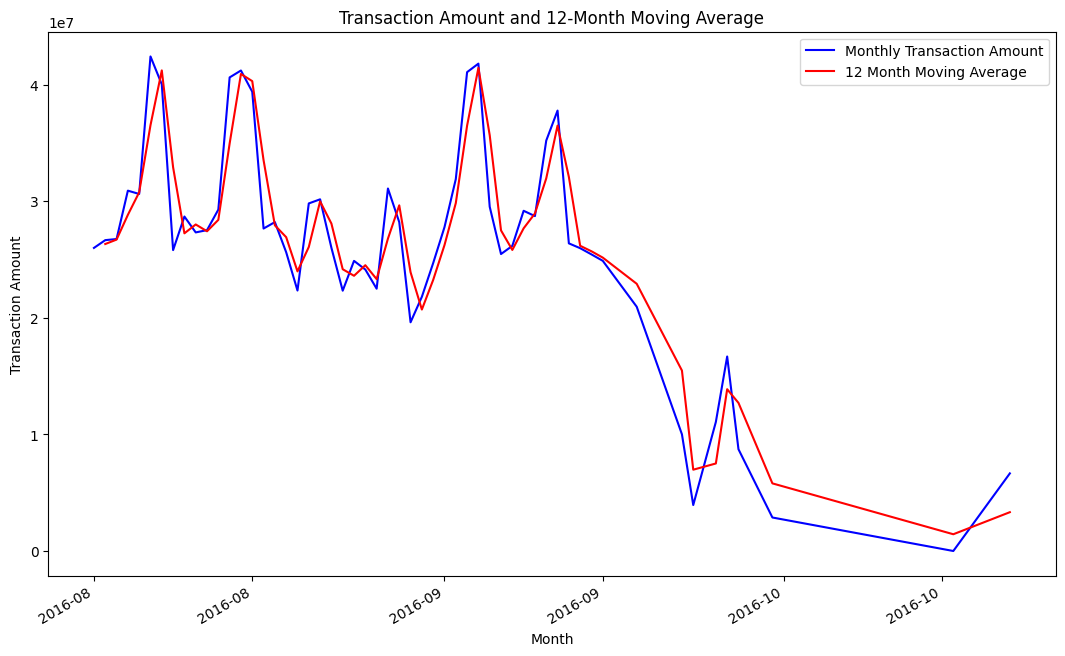

In [ ]:
import matplotlib.pyplot as plt

#first step for MA is to sorting the date
banking_transaction_df = banking_transaction_df.sort_values('transaction_date')

# Group by transaction_date and sum transaction_amount per date - must be sum / size / because it need to returned data frame
grouped_df = banking_transaction_df.groupby('transaction_date')['transaction_amount'].sum()

moving_avg = grouped_df.rolling(window=2).mean()

plt.figure(figsize=(13, 8))
plt.plot(grouped_df.index, grouped_df, label='Monthly Transaction Amount', color='blue')  # Plot original data
plt.plot(moving_avg.index, moving_avg, label='12 Month Moving Average', color='red')  # Plot moving average

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()

plt.title('Transaction Amount and 12-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.legend()

plt.show()


# Step 4: Phân tích đa biến (Multivariate Analysis)


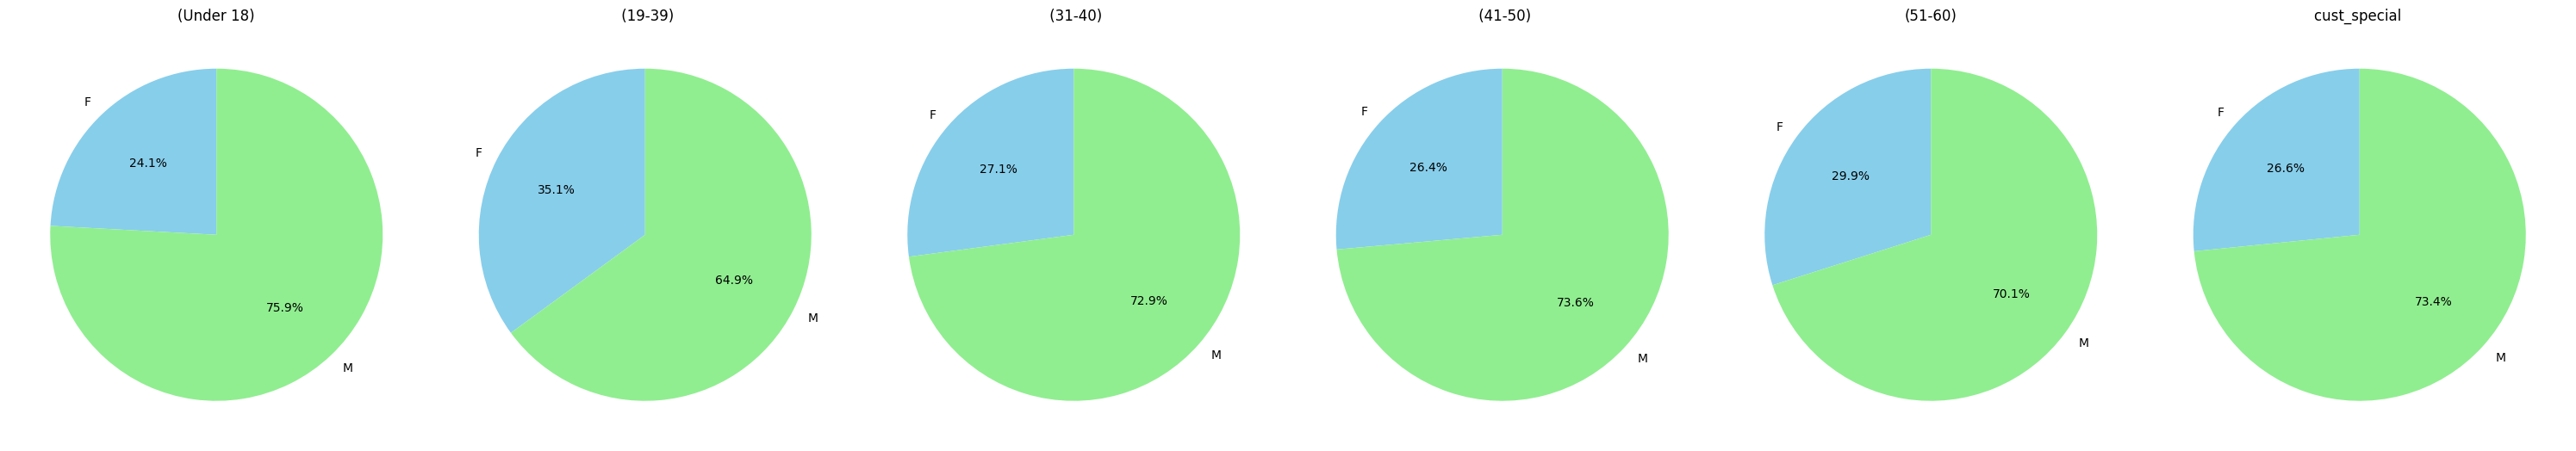

In [ ]:
import matplotlib.pyplot as plt

def plot_all_gender_transactions(datasets, titles):
    num_datasets = len(datasets)
    fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 6))

    for ax, data, title in zip(axes, datasets, titles):
        gender_transaction_totals = data.groupby('cust_gender')['transaction_amount'].sum()

        gender_transaction_totals.plot(kind='pie', labels=gender_transaction_totals.index, autopct='%1.1f%%',
                                       startangle=90, colors=['skyblue', 'lightgreen'], ax=ax)
        ax.set_ylabel('')
        ax.set_title(title)

    plt.tight_layout()
    plt.show()


datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]


titles = [
    '(Under 18)',
    ' (19-39)',
    ' (31-40)',
        ' (41-50)',
        '(51-60)',

    'cust_special '
]


plot_all_gender_transactions(datasets, titles)


<ipython-input-78-3326169bf806>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='count', data=weekday_counts, palette='viridis')
<ipython-input-78-3326169bf806>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data=month_counts, palette='magma')


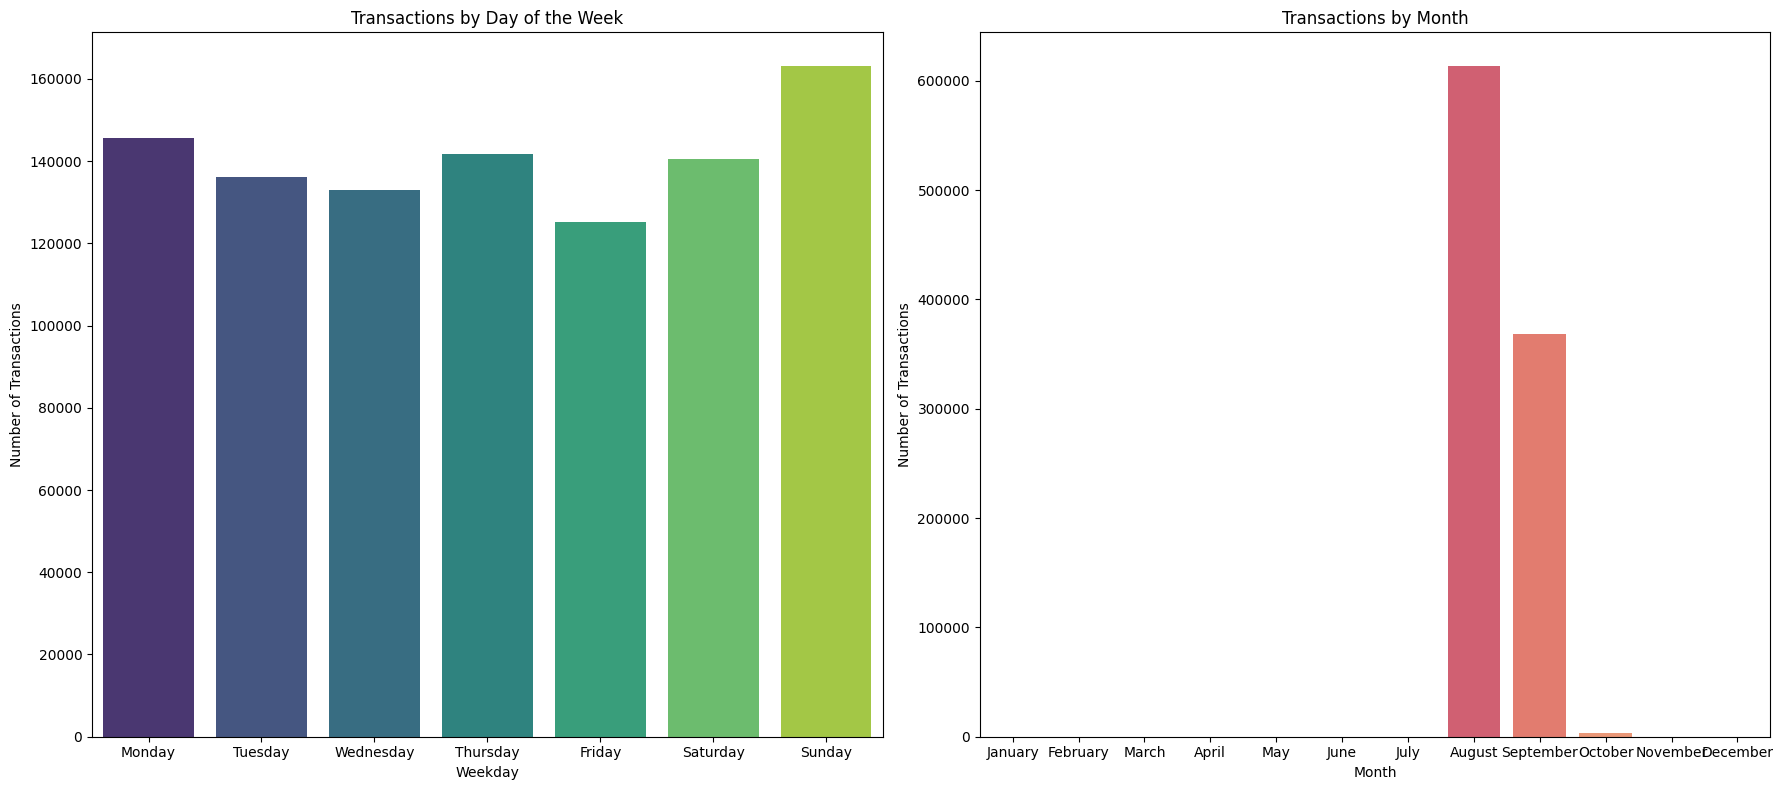

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#by week and by month
#ideas

# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html


def transactions_by_weekday_and_month(df):
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    #week / month
    df['weekday'] = df['transaction_date'].dt.day_name()
    df['month'] = df['transaction_date'].dt.month_name()

    #weekday
    weekday_counts = df.groupby('weekday').size().reset_index(name='count')
    week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    weekday_counts['weekday'] = pd.Categorical(weekday_counts['weekday'], categories=week_order, ordered=True)
    weekday_counts = weekday_counts.sort_values('weekday')

    #month
    month_counts = df.groupby('month').size().reset_index(name='count')
    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    month_counts['month'] = pd.Categorical(month_counts['month'], categories=month_order, ordered=True)
    month_counts = month_counts.sort_values('month')

    # Plotting the results
    plt.figure(figsize=(18, 8))
    plt.subplot(1, 2, 1)
    sns.barplot(x='weekday', y='count', data=weekday_counts, palette='viridis')
    plt.title('Transactions by Day of the Week')
    plt.xlabel('Weekday')
    plt.ylabel('Number of Transactions')

    plt.subplot(1, 2, 2)
    sns.barplot(x='month', y='count', data=month_counts, palette='magma')
    plt.title('Transactions by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')

    plt.tight_layout()
    plt.show()

transactions_by_weekday_and_month(banking_transaction_df)


#### The amounts of transactions in date by customer groups

<ipython-input-79-c7a84358a855>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, ax=ax, palette='viridis')
<ipython-input-79-c7a84358a855>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-79-c7a84358a855>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, ax=ax, palette='viridis')
<ipython-input-79-c7a84358a855>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-79-c7a84358a855>:15: FutureWarning:

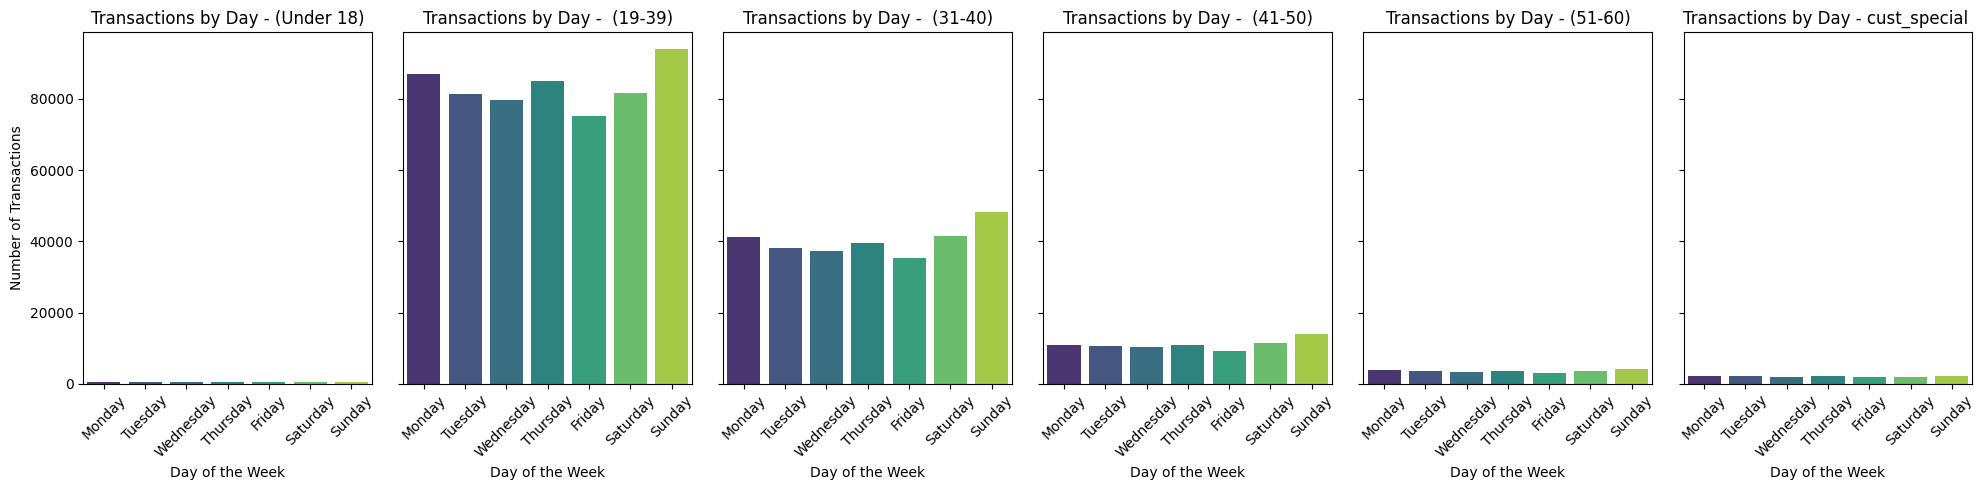

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_weekly_transactions_by_age_group(datasets, titles):
    fig, axes = plt.subplots(nrows=1, ncols=len(datasets), figsize=(20, 5), sharey=True)

    for dataset, title, ax in zip(datasets, titles, axes):
        dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])
        dataset['weekday'] = dataset['transaction_date'].dt.day_name()

        week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        weekday_counts = dataset.groupby('weekday')['transaction_id'].count().reindex(week_order)

        sns.barplot(x=weekday_counts.index, y=weekday_counts.values, ax=ax, palette='viridis')
        ax.set_title(f'Transactions by Day - {title}')
        ax.set_xlabel('Day of the Week')
        ax.set_ylabel('Number of Transactions')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]


titles = [
    '(Under 18)',
    ' (19-39)',
    ' (31-40)',
        ' (41-50)',
        '(51-60)',

    'cust_special '
]

plot_weekly_transactions_by_age_group(datasets, titles)


<ipython-input-80-091473db1809>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='cust_account_balance', ax=ax, palette='viridis')
<ipython-input-80-091473db1809>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='cust_account_balance', ax=ax, palette='viridis')
<ipython-input-80-091473db1809>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='cust_account_balance', ax=ax, palette='viridis')
<ipython-inpu

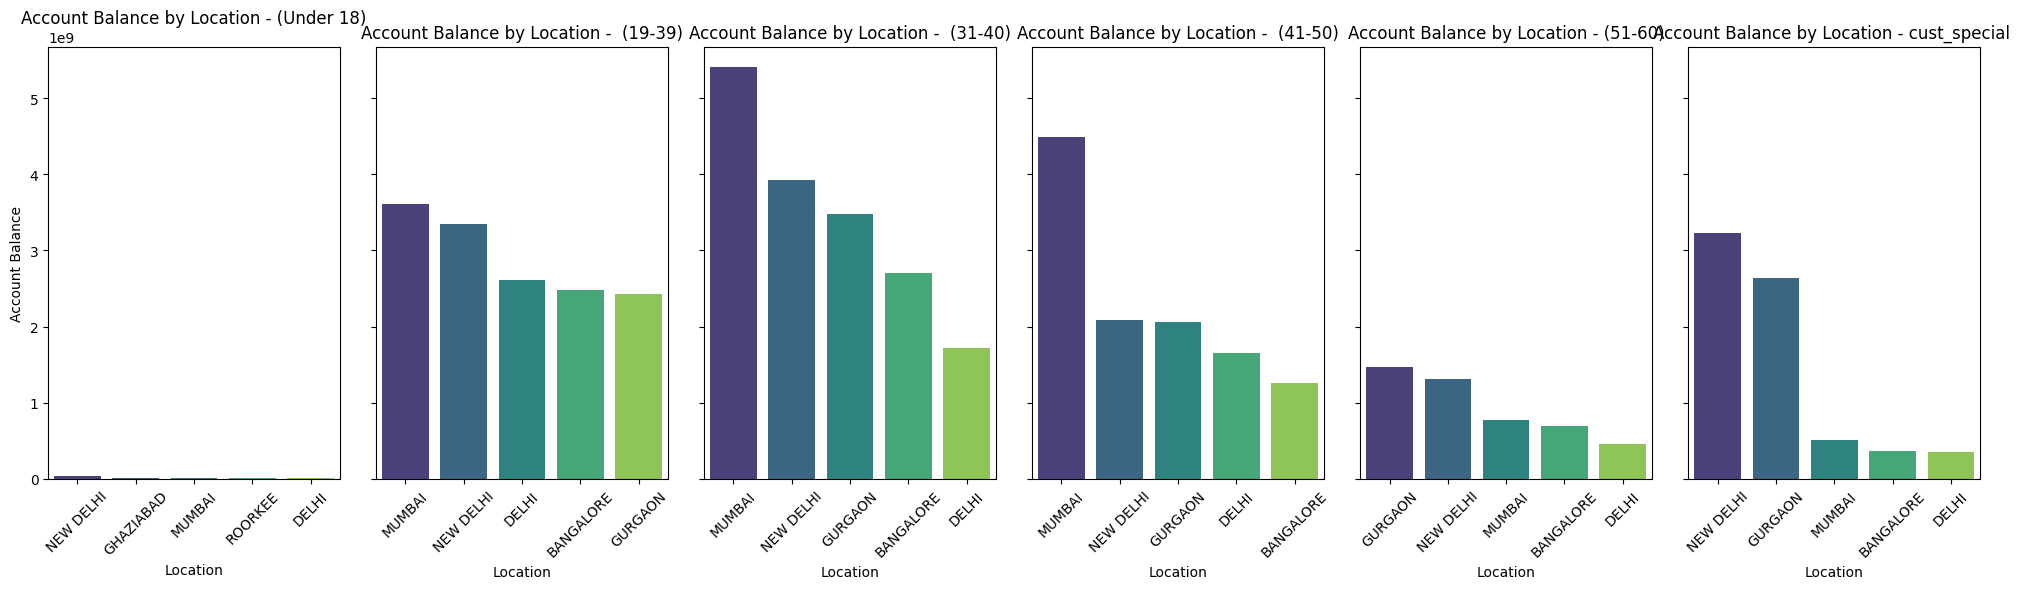

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top5_transactions_by_location(datasets, titles):
    fig, axes = plt.subplots(nrows=1, ncols=len(datasets), figsize=(20, 6), sharey=True)

    for ax, data, title in zip(axes, datasets, titles):
        location_data = data.groupby('cust_location')['cust_account_balance'].sum().reset_index()

        top5_location_data = location_data.sort_values(by='cust_account_balance', ascending=False).head(5)

        sns.barplot(data=top5_location_data, x='cust_location', y='cust_account_balance', ax=ax, palette='viridis')
        ax.set_title(f'Account Balance by Location - {title}')
        ax.set_xlabel('Location')
        ax.set_ylabel('Account Balance')
        ax.tick_params(axis='x', rotation=45)  # Rotate location labels for better readability

    plt.tight_layout()
    plt.show()

datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]


titles = [
    '(Under 18)',
    ' (19-39)',
    ' (31-40)',
        ' (41-50)',
        '(51-60)',

    'cust_special '
]
plot_top5_transactions_by_location(datasets, titles)


<ipython-input-81-dc22cd55870d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='cust_account_balance', ax=ax, palette='viridis')
<ipython-input-81-dc22cd55870d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='cust_account_balance', ax=ax, palette='viridis')
<ipython-input-81-dc22cd55870d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='cust_account_balance', ax=ax, palette='viridis')
<ipython-inpu

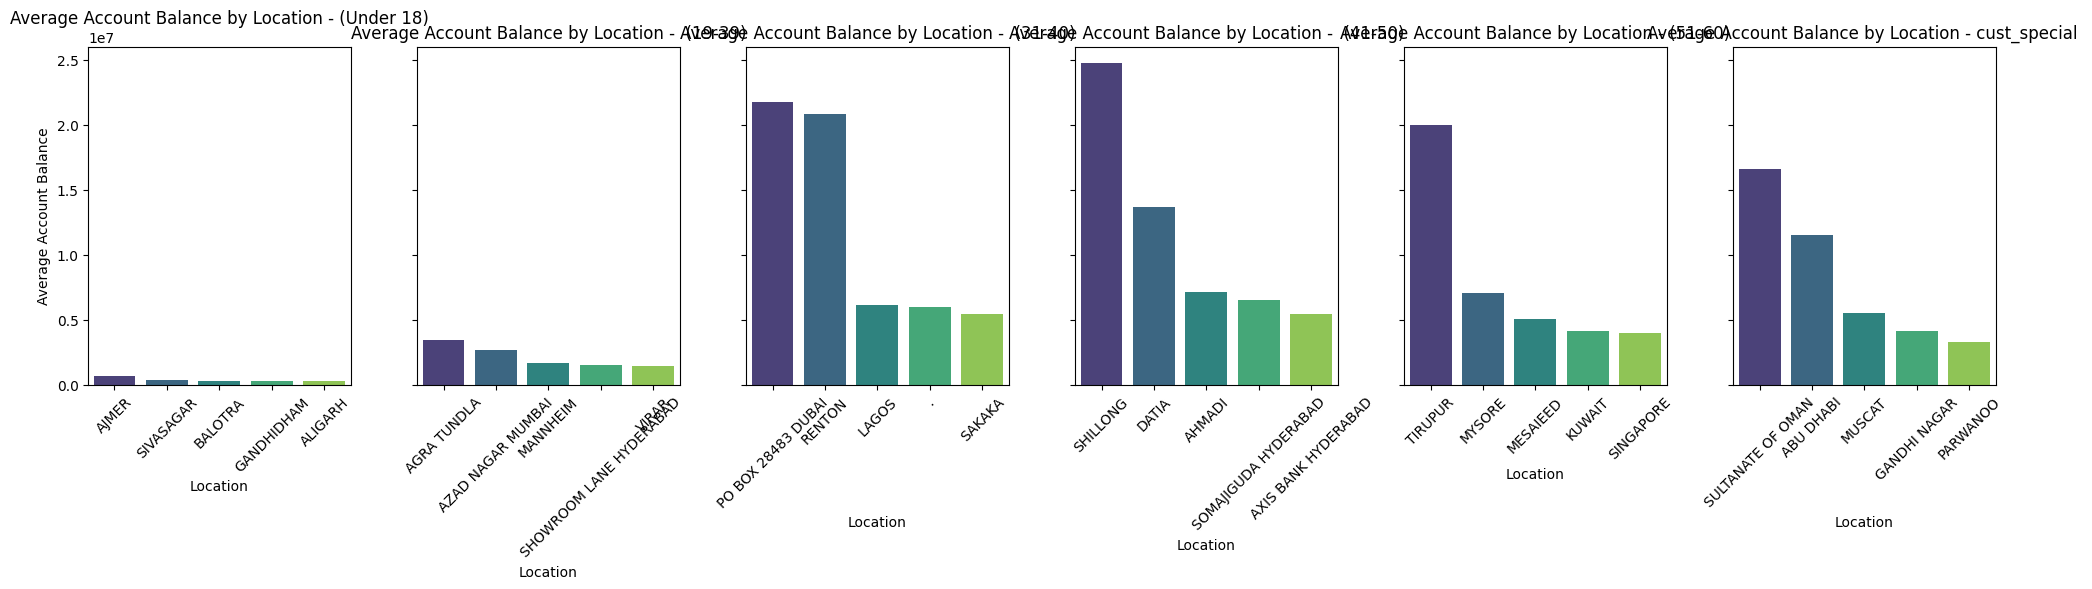

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top5_avg_account_balance_by_location(datasets, titles):
    fig, axes = plt.subplots(nrows=1, ncols=len(datasets), figsize=(20, 6), sharey=True)

    for ax, data, title in zip(axes, datasets, titles):
        location_data = data.groupby('cust_location')['cust_account_balance'].mean().reset_index()

        top5_location_data = location_data.sort_values(by='cust_account_balance', ascending=False).head(5)

        sns.barplot(data=top5_location_data, x='cust_location', y='cust_account_balance', ax=ax, palette='viridis')
        ax.set_title(f'Average Account Balance by Location - {title}')
        ax.set_xlabel('Location')
        ax.set_ylabel('Average Account Balance')
        ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]


titles = [
    '(Under 18)',
    ' (19-39)',
    ' (31-40)',
        ' (41-50)',
        '(51-60)',

    'cust_special '
]
plot_top5_avg_account_balance_by_location(datasets, titles)


 TOP 5 TRANSACTION AMOUNT BASED ON LOCATION

<ipython-input-82-90d611f419a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='transaction_amount', ax=ax, palette='viridis')
<ipython-input-82-90d611f419a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='transaction_amount', ax=ax, palette='viridis')
<ipython-input-82-90d611f419a3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_location_data, x='cust_location', y='transaction_amount', ax=ax, palette='viridis')
<ipython-input-82-9

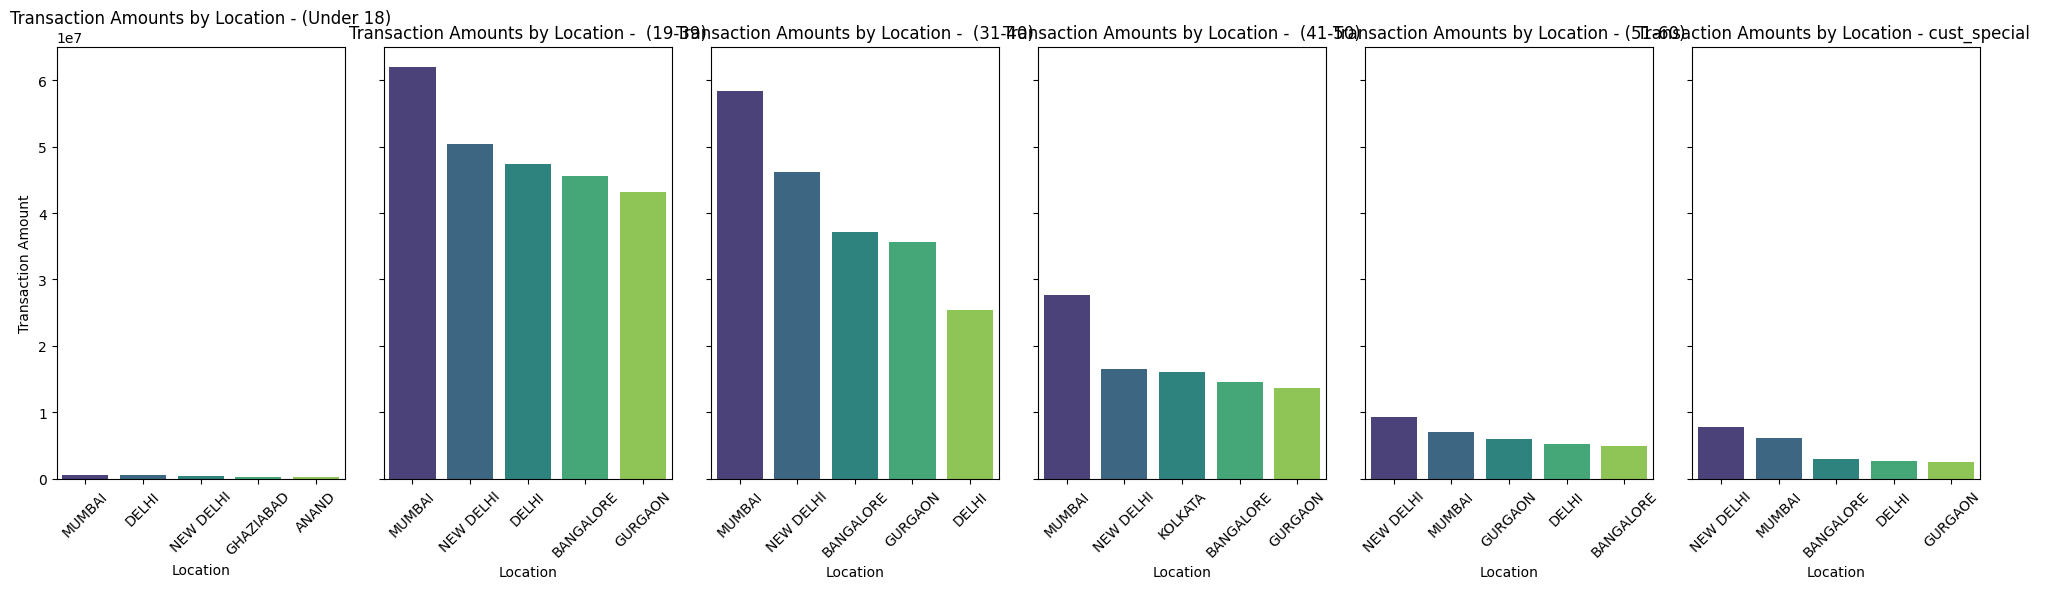

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top5_transactions_by_location(datasets, titles):
    fig, axes = plt.subplots(nrows=1, ncols=len(datasets), figsize=(20, 6), sharey=True)

    for ax, data, title in zip(axes, datasets, titles):
        location_data = data.groupby('cust_location')['transaction_amount'].sum().reset_index()

        top5_location_data = location_data.sort_values(by='transaction_amount', ascending=False).head(5)

        sns.barplot(data=top5_location_data, x='cust_location', y='transaction_amount', ax=ax, palette='viridis')
        ax.set_title(f'Transaction Amounts by Location - {title}')
        ax.set_xlabel('Location')
        ax.set_ylabel('Transaction Amount')
        ax.tick_params(axis='x', rotation=45)  # Rotate location labels for better readability

    plt.tight_layout()
    plt.show()

datasets = [cust_under_18_df,
cust_19_to_30_df,
cust_31_to_40_df,
cust_41_to_50_df,
cust_51_to_60_df,
cust_special_df,]


titles = [
    '(Under 18)',
    ' (19-39)',
    ' (31-40)',
        ' (41-50)',
        '(51-60)',

    'cust_special '
]

plot_top5_transactions_by_location(datasets, titles)


####  Number of Transaction by Gender by customer groups

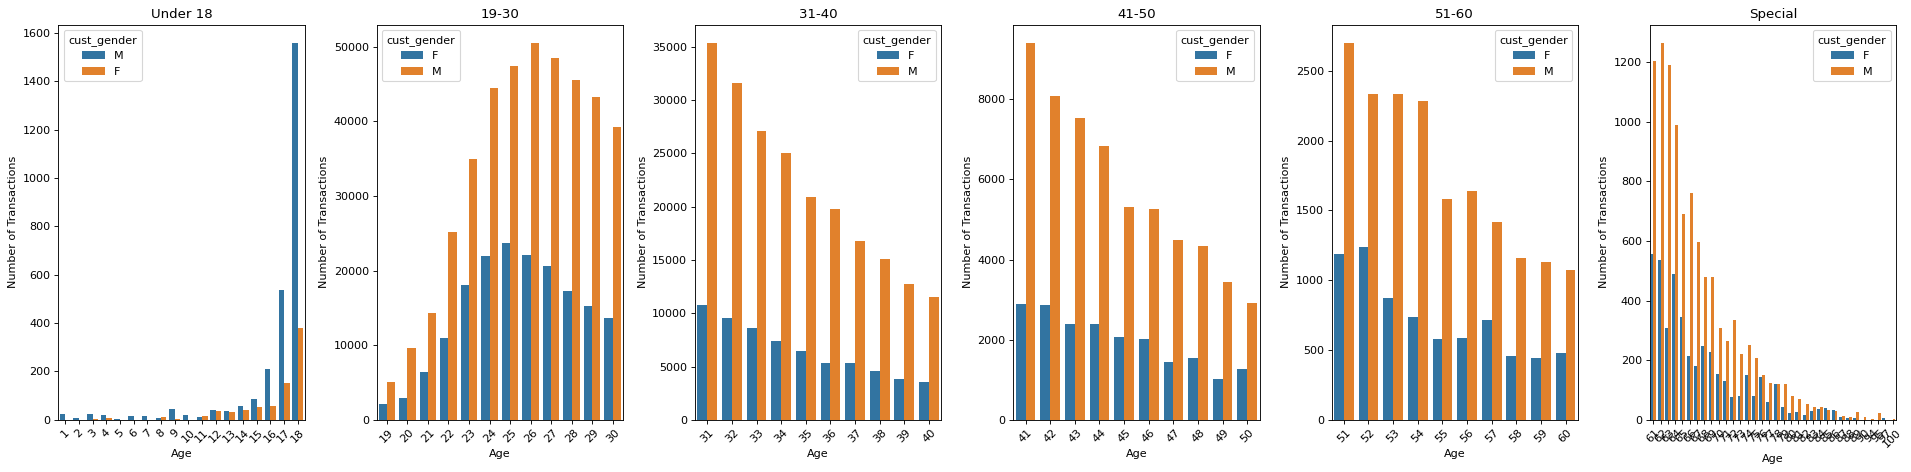

In [ ]:

def plot_transactions_by_age_gender(datasets, titles):
    fig, axes = plt.subplots(1, len(datasets), figsize=(24, 6), dpi=80)
    axes = axes.flatten()
    for ax, data, title in zip(axes, datasets, titles):
        grouped_data = data.groupby(['age', 'cust_gender'])['transaction_id'].count().reset_index()
        sns.barplot(data=grouped_data, x='age', y='transaction_id', hue='cust_gender', ax=ax)
        ax.set_title(title)
        ax.set_xlabel('Age')
        ax.set_ylabel('Number of Transactions')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

datasets = [cust_under_18_df, cust_19_to_30_df, cust_31_to_40_df, cust_41_to_50_df, cust_51_to_60_df, cust_special_df]
titles = ['Under 18', '19-30', '31-40', '41-50', '51-60', 'Special']

plot_transactions_by_age_gender(datasets, titles)

####Relationship between customer age, average account balance and average transaction amount

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def plot_age_balance_vs_transaction(datasets, titles):
    fig = go.Figure()

    for data, title in zip(datasets, titles):
        age_stats = data.groupby('age').agg({
            'cust_account_balance': 'mean',
            'transaction_amount': 'mean'
        }).reset_index()

        fig.add_trace(go.Scatter(
            x=age_stats['age'],
            y=age_stats['cust_account_balance'],
            mode='markers',
            marker=dict(
                size=age_stats['transaction_amount'],
                sizemode='area',
                sizeref=2.*max(age_stats['transaction_amount'])/(40.**2),
                sizemin=4
            ),
            name=title
        ))

    fig.update_layout(
        title='Relationship between Customer Age, Average Account Balance, and Average Transaction Amount',
        xaxis_title='Customer Age',
        yaxis_title='Average Account Balance',
        legend_title='Age Group',
        height=600,
        width=900
    )

    fig.show()

datasets = [cust_under_18_df, cust_19_to_30_df, cust_31_to_40_df, cust_41_to_50_df, cust_51_to_60_df, cust_special_df]
titles = ['Under 18', '19-30', '31-40', '41-50', '51-60', 'Special']


plot_age_balance_vs_transaction(datasets, titles)


#### Total Value of Transaction by Gender by customer groups

#### Linear Regression

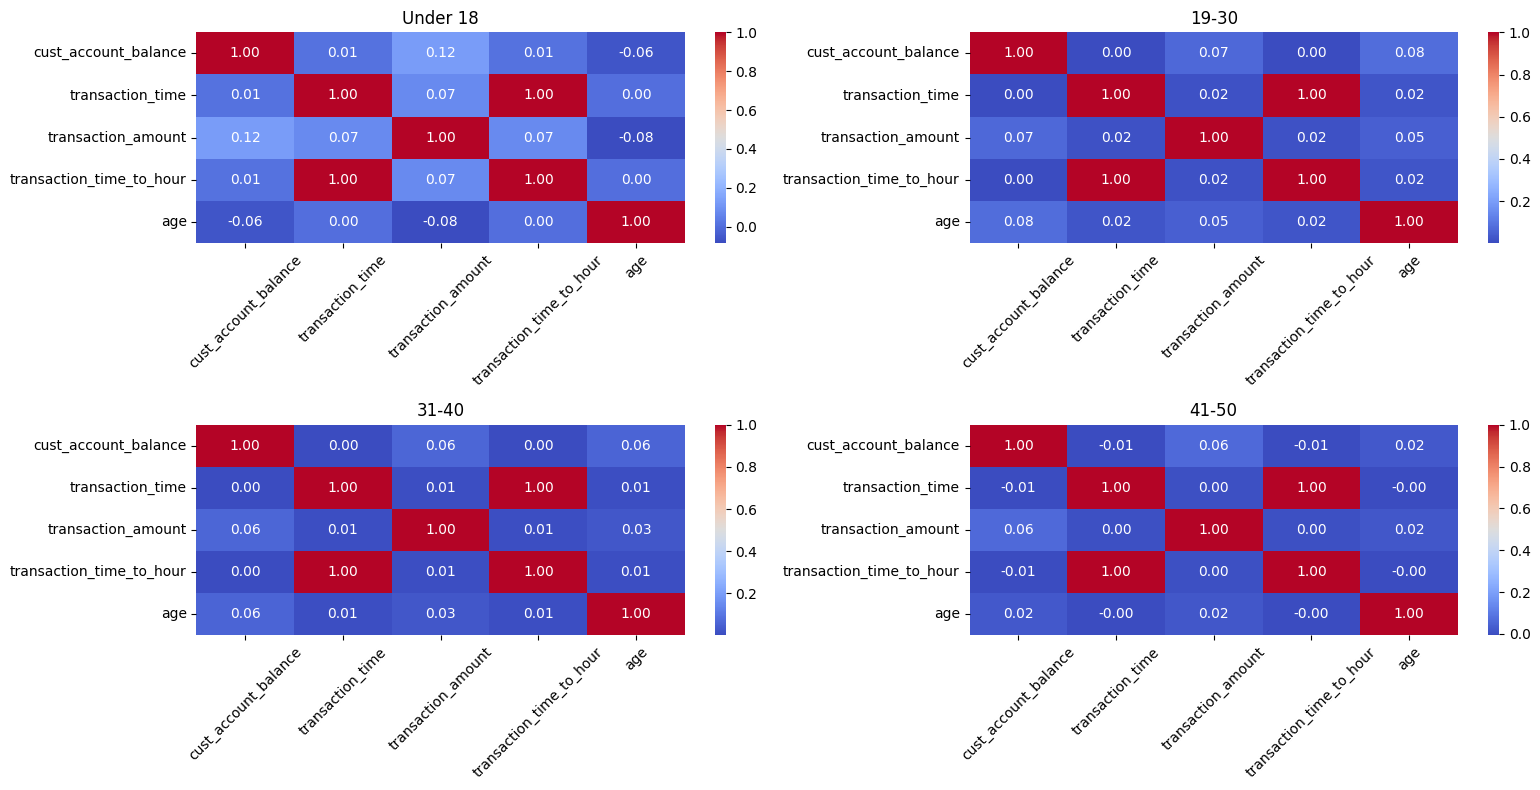

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmaps(datasets, titles):
    num_datasets = len(datasets)
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    axes = axes.flatten()

    for ax, data, title in zip(axes, datasets, titles):
        corr_matrix = data.select_dtypes(include=[np.number]).corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
        ax.set_title(title)
        ax.tick_params(axis='x', rotation=45)
        ax.tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.show()

plot_correlation_heatmaps(datasets, titles)
